## Credit Card Fraud Detection

This notebook builds and evaluates machine learning models to detect fraudulent credit card transactions using a highly imbalanced dataset.


## Dataset Overview

- Total transactions: 284,807  
- Fraud cases: 492  
- Legitimate cases: 284,315  
- No missing values


In [5]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
df.info()
df.isnull().sum()
df['Class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


X = df.drop("Class", axis=1)
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Confusion Matrix:
[[56848    16]
 [   30    68]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996     56864
           1     0.8095    0.6939    0.7473        98

    accuracy                         0.9992     56962
   macro avg     0.9045    0.8468    0.8734     56962
weighted avg     0.9991    0.9992    0.9992     56962



C:\Users\Pavan Kotian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


log_reg_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg_weighted.fit(X_train, y_train)

y_pred_weighted = log_reg_weighted.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_weighted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted))


Confusion Matrix:
[[55177  1687]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Data Preprocessing

- Train-test split
- Feature scaling using StandardScaler
- Class imbalance handled using SMOTE


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

## Baseline Models

We start with Logistic Regression and Random Forest to establish baseline performance.


In [9]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Get prediction probabilities
y_prob = model.predict_proba(X_test_scaled)[:,1]

thresholds = [0.5, 0.3, 0.2, 0.1]

for t in thresholds:
    y_pred_t = (y_prob > t).astype(int)
    cm = confusion_matrix(y_test, y_pred_t)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)

    print(f"\nThreshold: {t}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")



Threshold: 0.5
Confusion Matrix:
[[55478  1386]
 [    8    90]]
Precision: 0.061
Recall: 0.918

Threshold: 0.3
Confusion Matrix:
[[53663  3201]
 [    8    90]]
Precision: 0.027
Recall: 0.918

Threshold: 0.2
Confusion Matrix:
[[51349  5515]
 [    6    92]]
Precision: 0.016
Recall: 0.939

Threshold: 0.1
Confusion Matrix:
[[45549 11315]
 [    5    93]]
Precision: 0.008
Recall: 0.949


## Handling Class Imbalance

Due to extreme class imbalance, SMOTE is applied to improve fraud detection recall.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
X = df.drop("Class", axis=1)
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [9]:
model_lr_sm = LogisticRegression(max_iter=2000)
model_lr_sm.fit(X_train_sm, y_train_sm)

y_pred_lr_sm = model_lr_sm.predict(X_test_scaled)

print("\n📌 Logistic Regression (SMOTE)")
print(confusion_matrix(y_test, y_pred_lr_sm))
print(classification_report(y_test, y_pred_lr_sm))



📌 Logistic Regression (SMOTE)
[[55397  1467]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [11]:
model_rf_sm = RandomForestClassifier(class_weight=None, random_state=42)
model_rf_sm.fit(X_train_sm, y_train_sm)

y_pred_rf_sm = model_rf_sm.predict(X_test_scaled)

print("\n📌 Random Forest (SMOTE)")
print(confusion_matrix(y_test, y_pred_rf_sm))
print(classification_report(y_test, y_pred_rf_sm))



📌 Random Forest (SMOTE)
[[56852    12]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



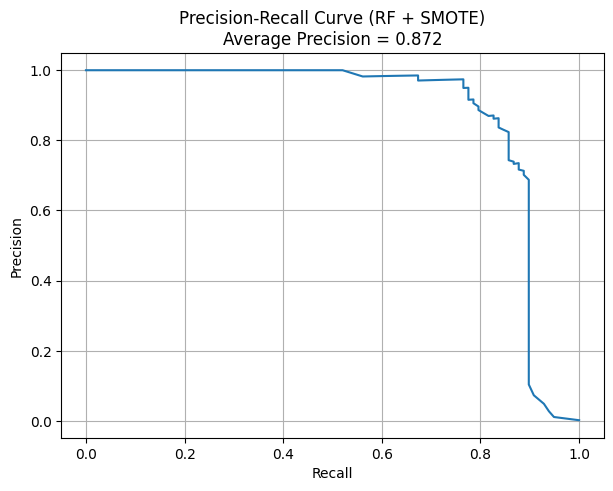

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get fraud probabilities from final RF + SMOTE model
y_scores = model_rf_sm.predict_proba(X_test_scaled)[:, 1]

# Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Average precision (summary metric)
ap = average_precision_score(y_test, y_scores)

# Plot
plt.figure(figsize=(7,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (RF + SMOTE)\nAverage Precision = {ap:.3f}")
plt.grid(True)
plt.show()


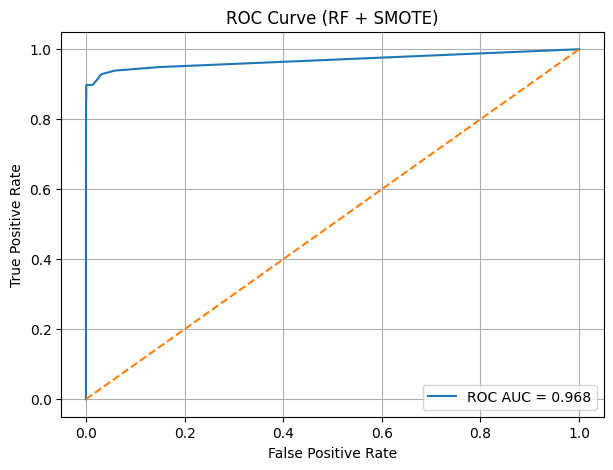

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilities for fraud class
y_scores = model_rf_sm.predict_proba(X_test_scaled)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (RF + SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Cross-validation
cv_scores = cross_val_score(
    rf,
    X,          # features
    y,          # target
    cv=5,
    scoring="roc_auc"
)

print("Cross-validation ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))



Cross-validation ROC-AUC scores: [0.75886381 0.90356549 0.91392461 0.9572649  0.93673301]
Mean ROC-AUC: 0.8940703625587846
Std deviation: 0.07011249779483208


## Hyperparameter Tuning

RandomizedSearchCV is used to optimize Random Forest hyperparameters using ROC-AUC as the evaluation metric.


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": [100],
    "max_depth": [10],
    "min_samples_split": [2],
    "min_samples_leaf": [2]
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring="roc_auc",
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best ROC-AUC:", random_search.best_score_)
print("Best Parameters:", random_search.best_params_)


C:\Users\Pavan Kotian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:324: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best ROC-AUC: 0.9788244396260968
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


## Final Model Evaluation

The final tuned Random Forest model is evaluated using:
- ROC-AUC
- Confusion Matrix
- Precision-Recall analysis


In [20]:

best_rf = random_search.best_estimator_


y_test_prob = best_rf.predict_proba(X_test)[:, 1]

y_test_pred = (y_test_prob >= 0.5).astype(int)

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

test_roc_auc = roc_auc_score(y_test, y_test_prob)
cm = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

test_roc_auc, cm, report


(0.9682252965902174,
 array([[56858,     6],
        [   18,    80]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56864\n           1       0.93      0.82      0.87        98\n\n    accuracy                           1.00     56962\n   macro avg       0.96      0.91      0.93     56962\nweighted avg       1.00      1.00      1.00     56962\n')

## Conclusion

The tuned Random Forest model achieves strong fraud detection performance with high ROC-AUC and a good balance between precision and recall, making it suitable for real-world fraud detection systems.
